In [1]:
import sys
from pathlib import Path
# Add the directory containing edm2/generate.py to the Python path
script_dir = Path("/vol/ideadata/ed52egek/pycharm/trichotomy").resolve()  # Replace with the actual path
sys.path.append(str(script_dir))

import pickle

# Define the path to load the file
load_path = "metrics.pkl"
guid = ["0.7", "0.8", "0.9", "1.0", "1.1","1.2", "1.3","1.4","1.5","1.6","1.7"]
# Load the data
with open(load_path, "rb") as f:
    data = pickle.load(f)

# Extract variables
irss = data["irss"]
fids = data["fids"]
aurocs = data["aurocs_clean"]

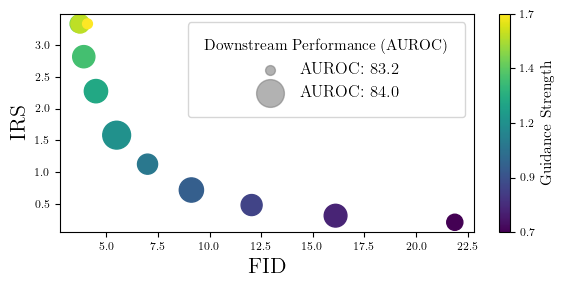

In [7]:
from src.utils import update_matplotlib_font
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
update_matplotlib_font()
plt.figure(figsize=(6, 3))  # Increased size for better visibility

# Normalize colormap to match the actual range of guid values
norm = mcolors.Normalize(vmin=0.7, vmax=1.7)

# Normalize AUROCs to scale them properly
aurocs = np.array(aurocs)  # Convert to NumPy array for manipulation
min_size, max_size = 50, 400  # Define a reasonable size range

# Scale AUROCs to be between min_size and max_size
aurocs_scaled = min_size + (aurocs - np.min(aurocs)) / (np.max(aurocs) - np.min(aurocs) + 1e-6) * (max_size - min_size)

# Create scatter plot with correct coloring
sc = plt.scatter(fids, irss, s=aurocs_scaled, c=[float(g) for g in guid], cmap='viridis', norm=norm, label="IRS")

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Guidance Strength")

# Set colorbar ticks to be within the range of 0.7 to 1.7
num_ticks = 5
tick_values = np.linspace(0.7, 1.7, num_ticks)
cbar.set_ticks(tick_values)
cbar.set_ticklabels([f"{t:.1f}" for t in tick_values])

from matplotlib.legend_handler import HandlerTuple

# Create legend markers
legend_sizes = np.linspace(min_size, max_size, 2)
legend_labels = np.linspace(np.min(aurocs), np.max(aurocs), 2)

scatter_legend = [plt.scatter([], [], s=s, color='gray', alpha=0.6) for s in legend_sizes]

# Add the legend with a proper handler
plt.legend([(s,) for s in scatter_legend], [f"AUROC: {label:.1f}" for label in legend_labels], 
           handler_map={tuple: HandlerTuple(ndivide=None)}, title="Downstream Performance (AUROC)",
           loc="upper right", frameon=True, fontsize=12, borderpad=1)
plt.xlabel("FID", fontsize=16)
plt.ylabel("IRS", fontsize=16)
plt.tight_layout()
plt.savefig("IRS_and_FID_vs_aucroc.pdf", dpi=400)
plt.show()